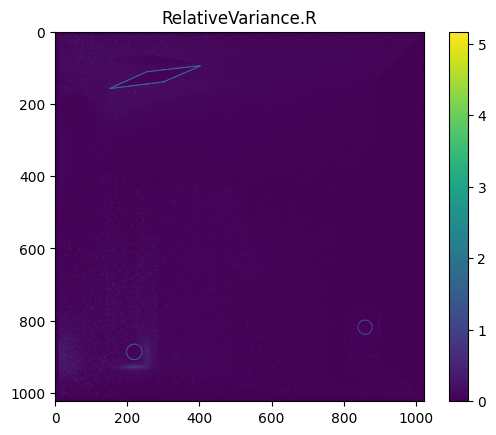

In [12]:
import OpenEXR
import Imath
import numpy as np
import matplotlib.pyplot as plt

# Load the .exr file
exr_file = "/mnt/b2cloudstorage/Rendering-MC/PBRTv4/renderings/cornell-box-GBuffer.exr"  # Replace with your EXR file path
exr = OpenEXR.InputFile(exr_file)

# Get channel details
header = exr.header()
# channel = "Variance.R"
channel = "RelativeVariance.R"

if channel not in header['channels']:
    print(f"Channel {channel} not found in the EXR file.")
    exit(1)

# Read channel data
dw = header['dataWindow']
size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)
data = exr.channel(channel, Imath.PixelType(Imath.PixelType.FLOAT))

# Convert to NumPy array
img = np.frombuffer(data, dtype=np.float32).reshape(size[1], size[0])

# Display the channel using Matplotlib
plt.imshow(img, cmap="viridis")
plt.colorbar()
plt.title(channel)
plt.show()


In [13]:
print(img.mean())

0.06689143
